<a href="https://colab.research.google.com/github/RodrigoDSVDF/An-lise-de-Dados/blob/main/An%C3%A1lisedeCriptoMoedas_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

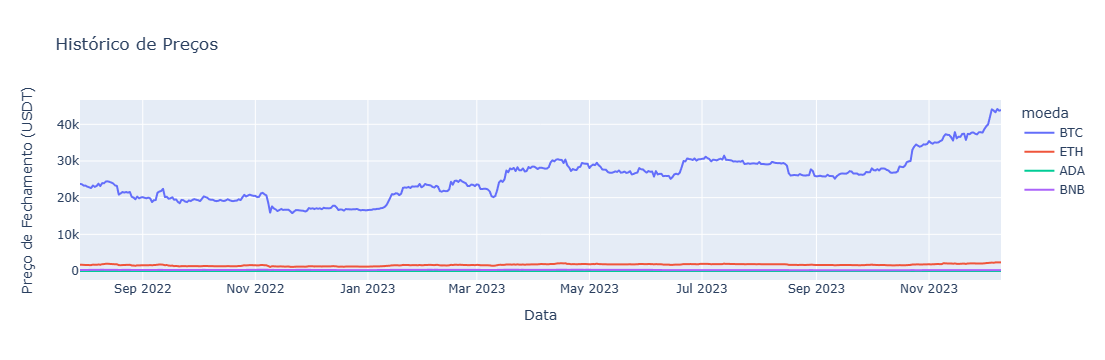

In [ ]:
import ccxt
import pandas as pd
import plotly.express as px

# Conexão com a Binance
exchange = ccxt.binance({
    'apiKey': 'i4QeU6dT1xo2kKQYDnw3tqr5VATR4DcdEt3l6dInrmM9pfv9IHPczv7CGDRPZDTi',
    'secret': 'Mt1LVBB2N8hTgFIKmG50uwGKUxIYgiejhwJr8ozHw5xvhMJDC6bu4kq6iIdS5943',
})

# Lista das moedas que você quer importar
moedas = ['BTC/USDT', 'ETH/USDT', 'ADA/USDT', 'BNB/USDT']

# Função para importar dados históricos da Binance
def importar_dados(moeda):
    data = exchange.fetch_ohlcv(moeda, '1d')
    df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df['moeda'] = moeda.split('/')[0]  # Extrair o código da moeda (BTC, ETH, ADA, FDUSD)
    return df

# Importar os dados de todas as moedas e concatenar em um único DataFrame
dados = pd.concat([importar_dados(moeda) for moeda in moedas], ignore_index=True)

# Plotar usando plotly express
fig = px.line(dados, x='timestamp', y='close', color='moeda', labels={'close': 'Preço de Fechamento (USDT)'}, title='Histórico de Preços')
fig.update_xaxes(title_text='Data')
fig.show()


In [ ]:
dados.head()

,timestamp,open,high,low,close,volume,moeda
0,2022-07-29,23845.25,24442.66,23414.03,23773.75,198298.50623,BTC
1,2022-07-30,23777.28,24668.00,23502.25,23643.51,151060.13211,BTC
2,2022-07-31,23644.64,24194.82,23227.31,23293.32,127743.32483,BTC
3,2022-08-01,23296.36,23509.68,22850.00,23268.01,144210.16219,BTC
4,2022-08-02,23266.90,23459.89,22654.37,22987.79,158073.28225,BTC


In [ ]:
print(dados.columns)


Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'moeda'], dtype='object')


In [ ]:

# Se 'Moeda' for uma coluna, agrupe por 'Moeda'
estatisticas_moeda = dados.groupby('moeda')['close'].describe()

# Exibição dos resultados
print(estatisticas_moeda)

       count          mean          std         min          25%          50%  \
moeda                                                                           
ADA    500.0      0.352239     0.075698      0.2421      0.29085      0.35435   
BNB    500.0    271.974800    38.620066    205.1000    240.20000    276.05000   
BTC    500.0  25307.979220  5881.353417  15781.2900  20274.56000  25994.29000   
ETH    500.0   1658.930960   254.059079   1102.7300   1543.91500   1660.46000   

              75%         max  
moeda                          
ADA        0.3942      0.5879  
BNB      306.8250    354.6000  
BTC    28807.3650  44170.9900  
ETH     1852.1100   2358.7200  


# Análise estátistica das seguintes MOEDAS:
# ADA
# BNB
# BTC
# ETH

In [ ]:
# Agrupa por 'Moeda# '
estatisticas_moeda = dados.groupby('moeda')['close'].describe()

# Adiciona um título à saída
print(f"Estatisticas por moeda:")
print(estatisticas_moeda)

Estatisticas por moeda:
       count          mean          std         min          25%          50%  \
moeda                                                                           
ADA    500.0      0.352239     0.075698      0.2421      0.29085      0.35435   
BNB    500.0    271.974800    38.620066    205.1000    240.20000    276.05000   
BTC    500.0  25307.979220  5881.353417  15781.2900  20274.56000  25994.29000   
ETH    500.0   1658.930960   254.059079   1102.7300   1543.91500   1660.46000   

              75%         max  
moeda                          
ADA        0.3942      0.5879  
BNB      306.8250    354.6000  
BTC    28807.3650  44170.9900  
ETH     1852.1100   2358.7200  



# Com base nos  histogramas, podemos fazer as seguintes interpretações sobre a distribuição do volume de negociação de criptomoedas:

# A maioria dos valores de volume de negociação está concentrada em um intervalo relativamente pequeno.
# Há alguns valores muito altos, que podem ser considerados outliers.
#

# BTC: O volume de negociação da BTC é razoavél. A maioria dos valores está entre 1.000 e 4.000. No entanto, há alguns valores muito altos, com um pico em cerca de 70.000.
# ETH: O volume de negociação da ETH é geralmente mais alto do que o da BTC. A maioria dos valores está entre 0.2 e 5.0. No entanto, há alguns valores muito altos, com um pico em cerca de 7.0.
# Essas interpretações podem ser úteis para o investidor e analistas de mercado. Por exemplo, um investidor que está considerando investir em uma criptomoeda pode usar o histograma para avaliar o risco de volatilidade do volume de negociação.

# Outras interepretações:

# A distribuição do volume de negociação pode ser diferente para diferentes períodos de tempo. Por exemplo, o volume de negociação pode ser maior durante períodos de alta volatilidade do mercado.

# A distribuição do volume de negociação pode ser diferente para diferentes exchanges. Por exemplo, o volume de negociação pode ser maior em exchanges mais líquidas.
# Para outras interpretações é necessário  analisar o histograma para diferentes períodos de tempo e diferentes exchanges.

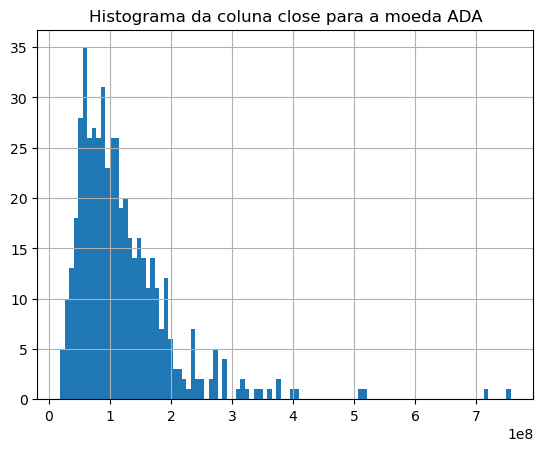

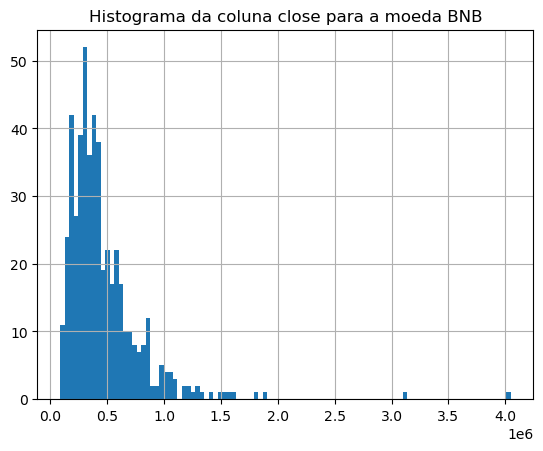

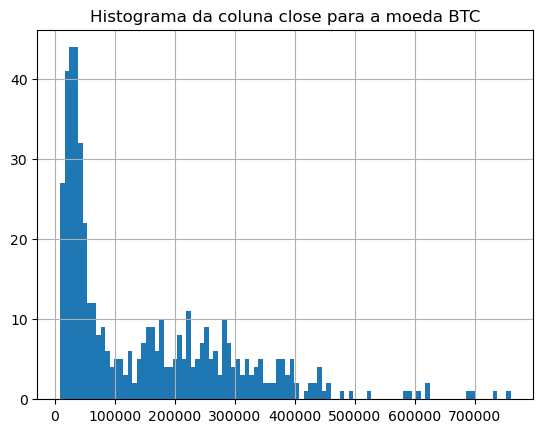

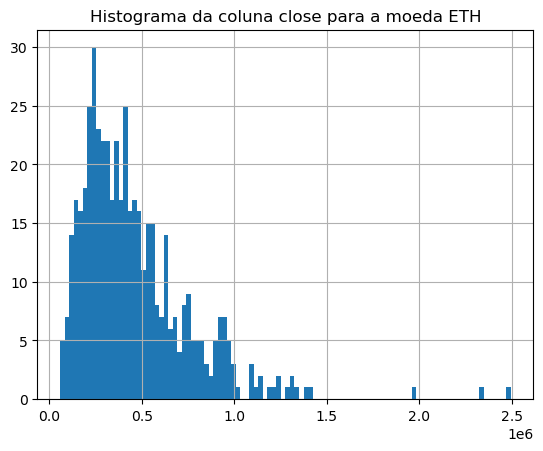

In [ ]:
dados_agrupados = dados.groupby('moeda')['volume']

# Plota um histograma para cada moeda
for moeda, dados_moeda in dados_agrupados:
    dados_moeda.hist(bins=100)
    plt.title(f'Histograma da coluna close para a moeda {moeda}')
    plt.show()

In [ ]:
df_BTC = dados[dados['moeda'] == 'BTC']
df_ETH = dados[dados['moeda'] == 'ETH']
df_ADA = dados[dados['moeda'] == 'ADA']
df_BNB = dados[dados['moeda'] == 'BNB']



In [ ]:
df_BTC['timestamp'] = pd.to_datetime(df_BTC['timestamp'], format='%Y-%m-%d')
df_ETH['timestamp'] = pd.to_datetime(df_ETH['timestamp'], format='%Y-%m-%d')
df_ADA['timestamp'] = pd.to_datetime(df_ADA['timestamp'], format='%Y-%m-%d')
df_BNB['timestamp'] = pd.to_datetime(df_BNB['timestamp'], format='%Y-%m-%d')

C:\Users\Rodrigo_df\AppData\Local\Temp\ipykernel_24348\1050890970.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rodrigo_df\AppData\Local\Temp\ipykernel_24348\1050890970.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Rodrigo_df\AppData\Local\Temp\ipykernel_24348\1050890970.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

<Axes: >

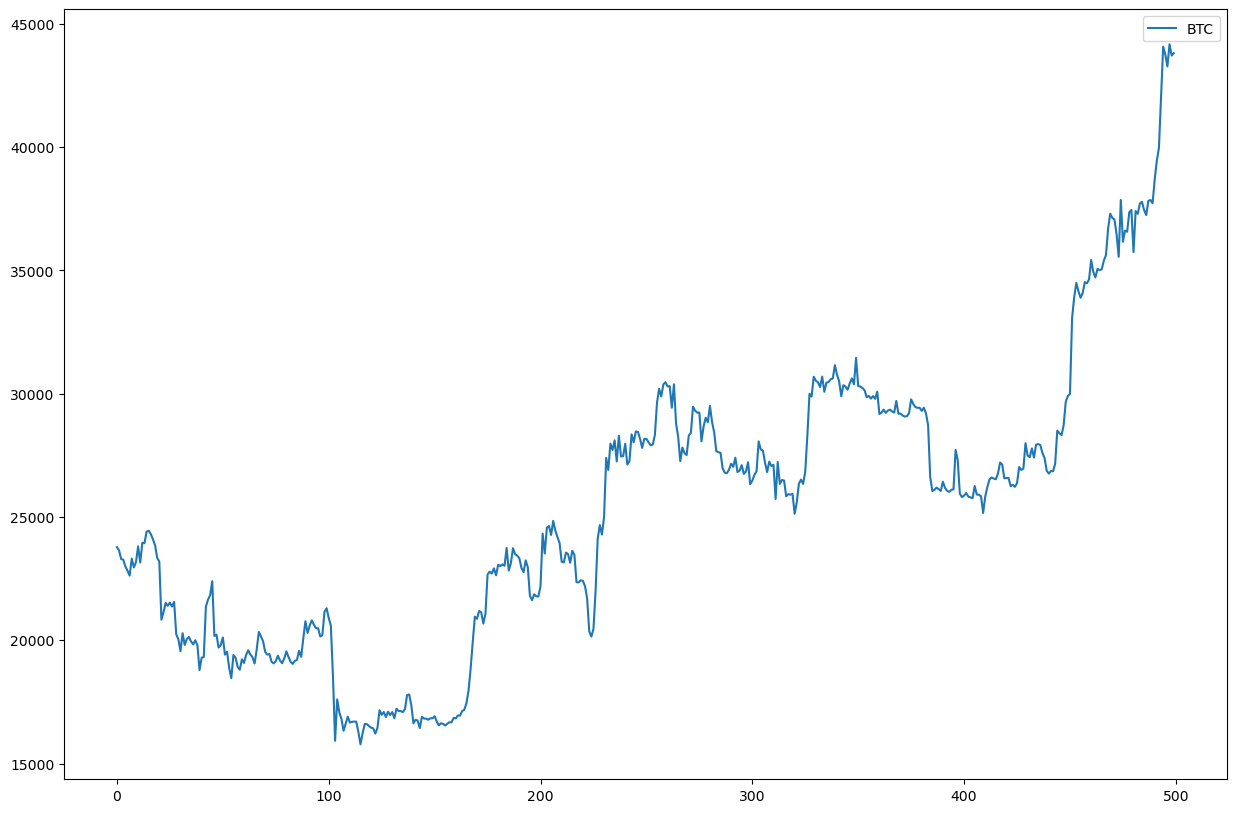

In [ ]:
df_BTC['close'].plot(legend=True, label='BTC', figsize=(15, 10))


<Axes: >

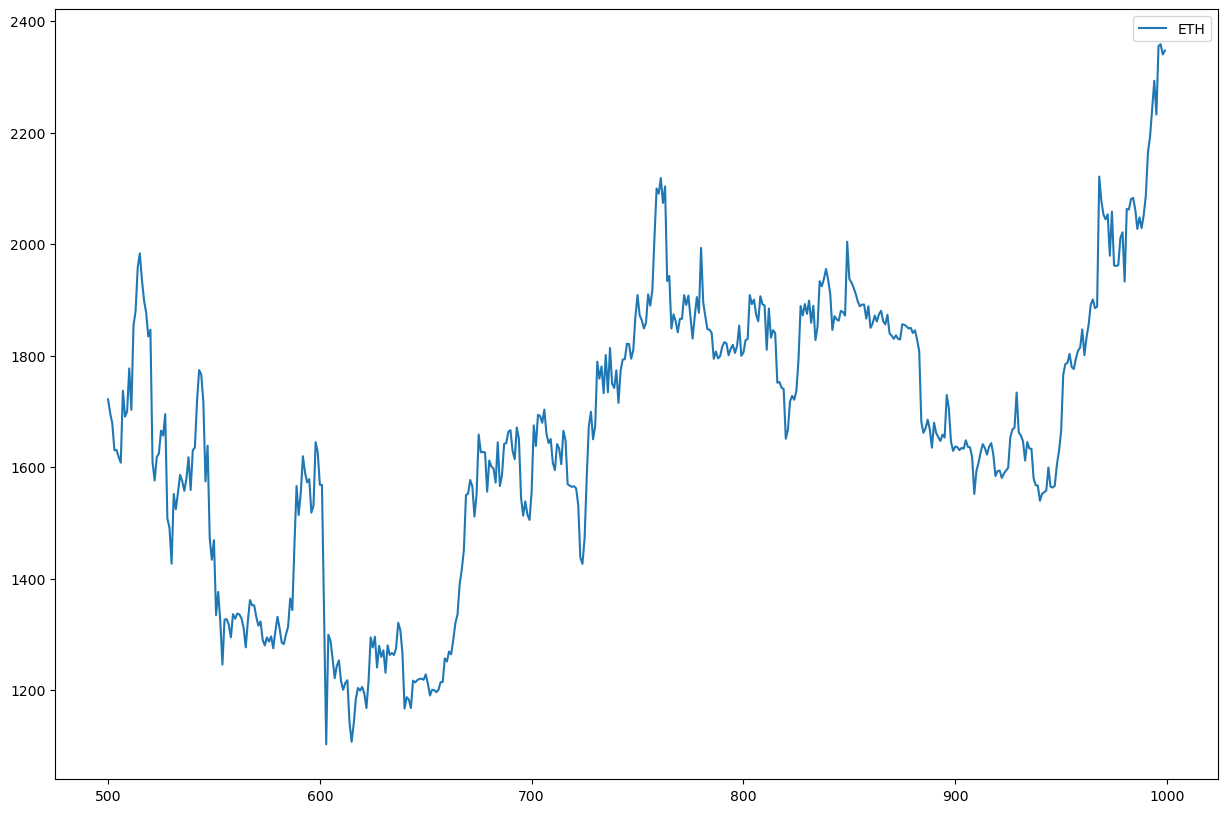

In [ ]:
df_ETH['close'].plot(legend=True, label='ETH', figsize=(15,10))

# Análise de Fechamento do Preço de 4 Moedas

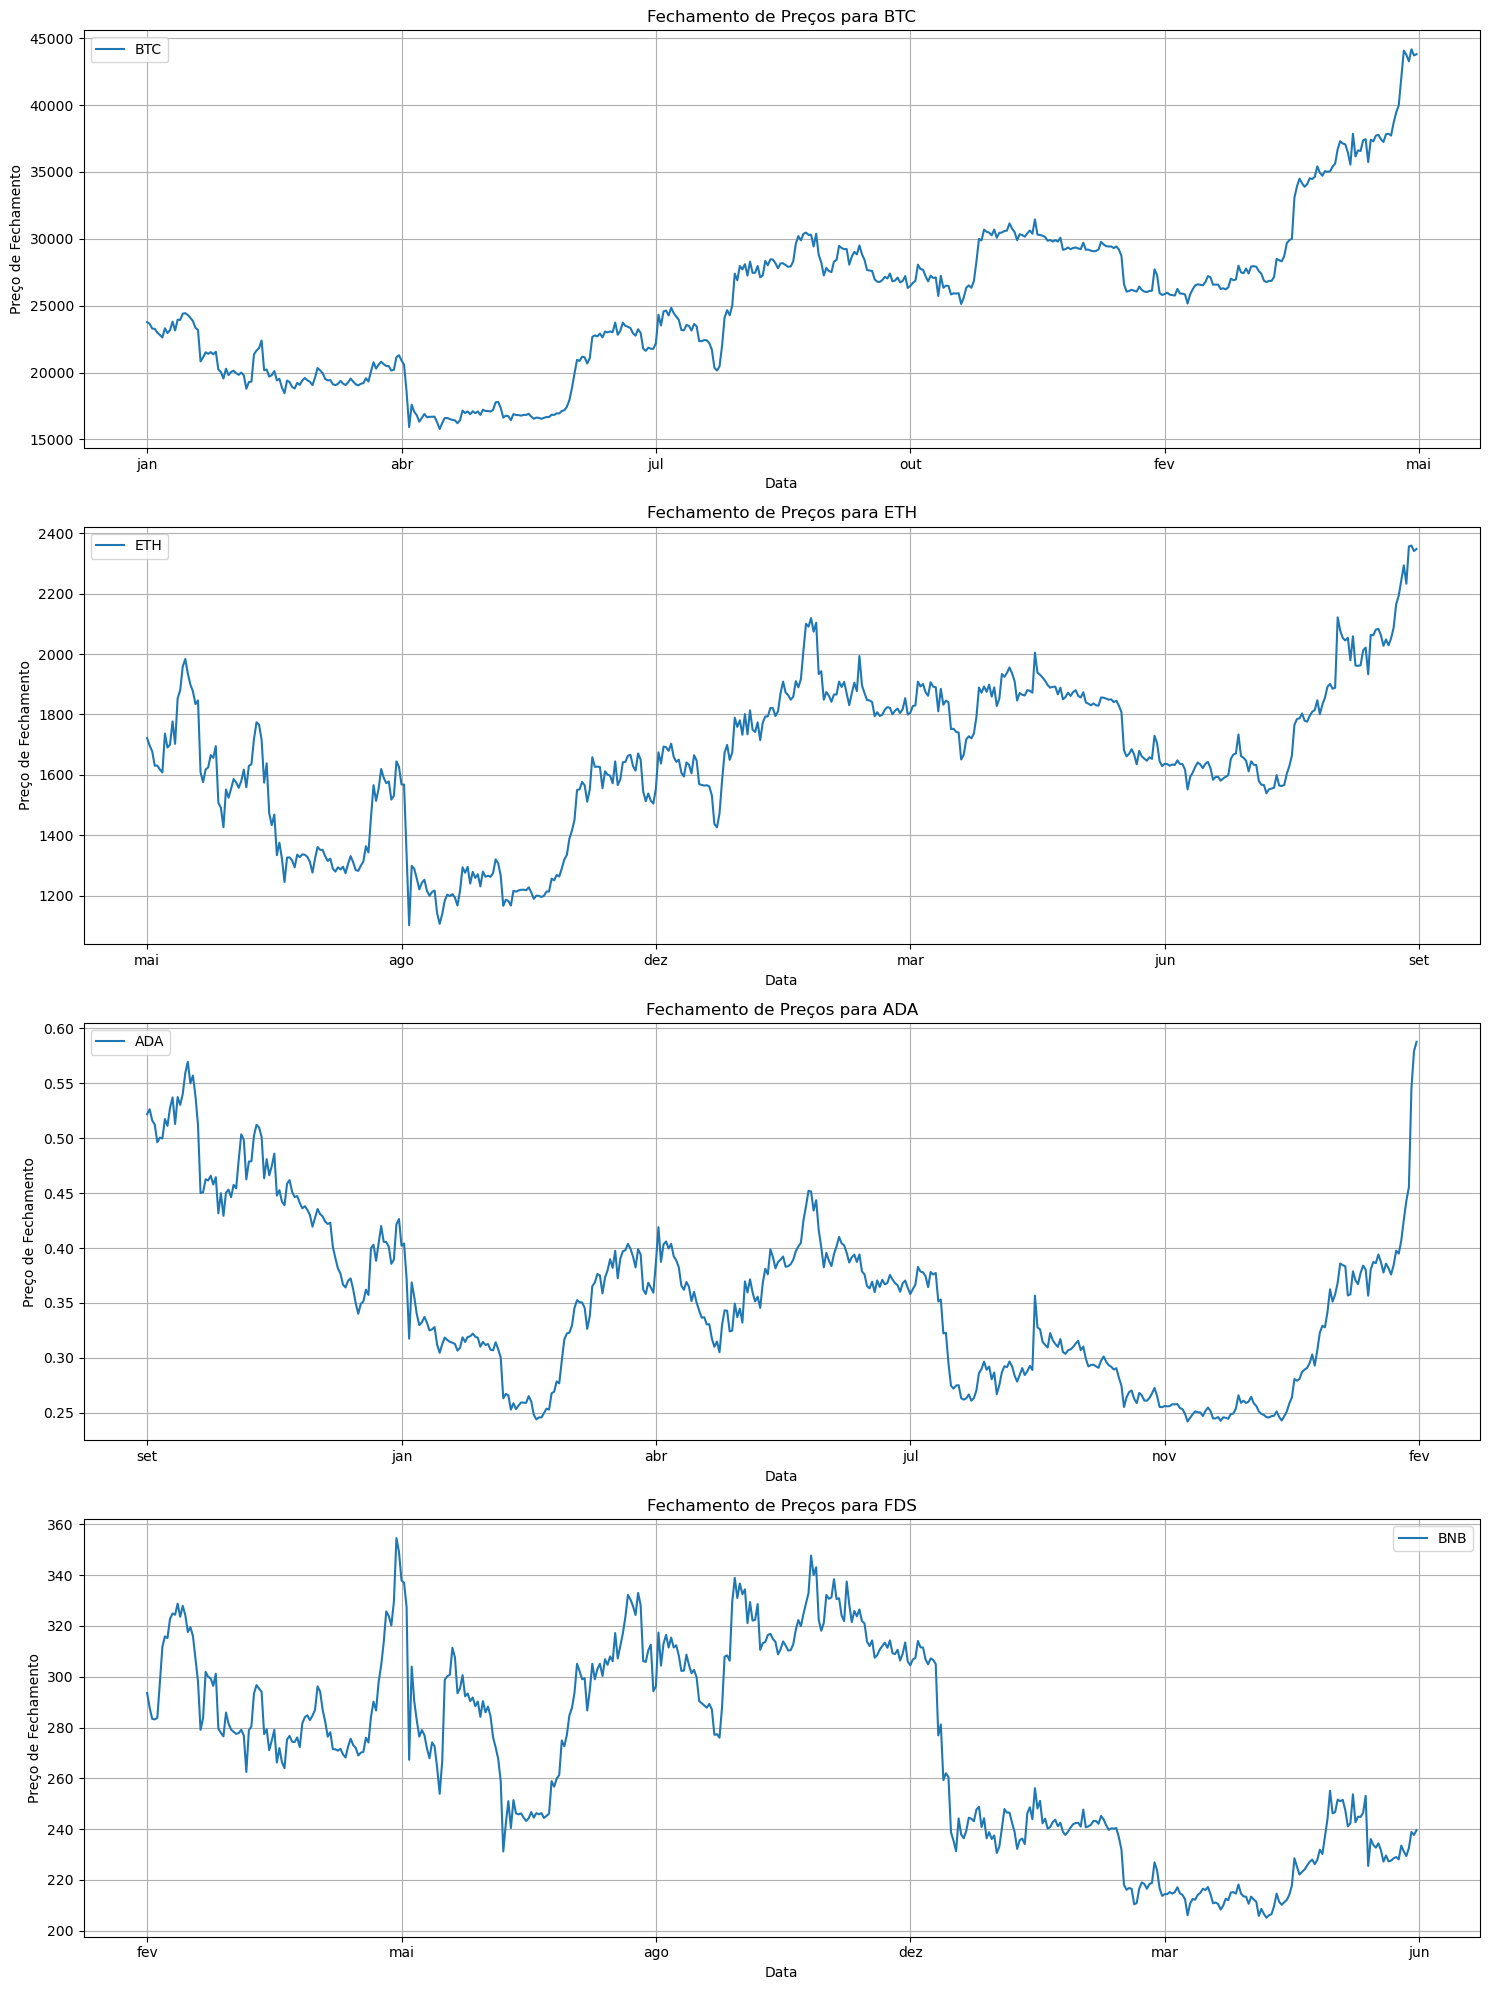

In [ ]:
import matplotlib.dates as mdates
import locale

# Configura o idioma do ambiente para português
locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')

# Configura o tamanho da figura
plt.figure(figsize=(15, 20))

# Cria subplots para cada moeda
ax1 = plt.subplot(411)
ax2 = plt.subplot(412)
ax3 = plt.subplot(413)
ax4 = plt.subplot(414)

# Plot para BTC
df_BTC['close'].plot(ax=ax1, legend=True, label='BTC')

# Plot para ETH
df_ETH['close'].plot(ax=ax2, legend=True, label='ETH')

# Plot para ADA
df_ADA['close'].plot(ax=ax3, legend=True, label='ADA')

# Plot para FDS
df_BNB['close'].plot(ax=ax4, legend=True, label='BNB')

# Adiciona rótulos e título para cada subplot
ax1.set_title('Fechamento de Preços para BTC')
ax1.set_xlabel('Data')
ax1.set_ylabel('Preço de Fechamento')
ax2.set_title('Fechamento de Preços para ETH')
ax2.set_xlabel('Data')
ax2.set_ylabel('Preço de Fechamento')
ax3.set_title('Fechamento de Preços para ADA')
ax3.set_xlabel('Data')
ax3.set_ylabel('Preço de Fechamento')
ax4.set_title('Fechamento de Preços para FDS')
ax4.set_xlabel('Data')
ax4.set_ylabel('Preço de Fechamento')

# Configura o formato do eixo x para mostrar apenas os meses em português
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Adiciona a grade para melhor visualização
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()



# Retornos diários em Porcetagem  
# Moeda Analizada "BTC/USDT'"

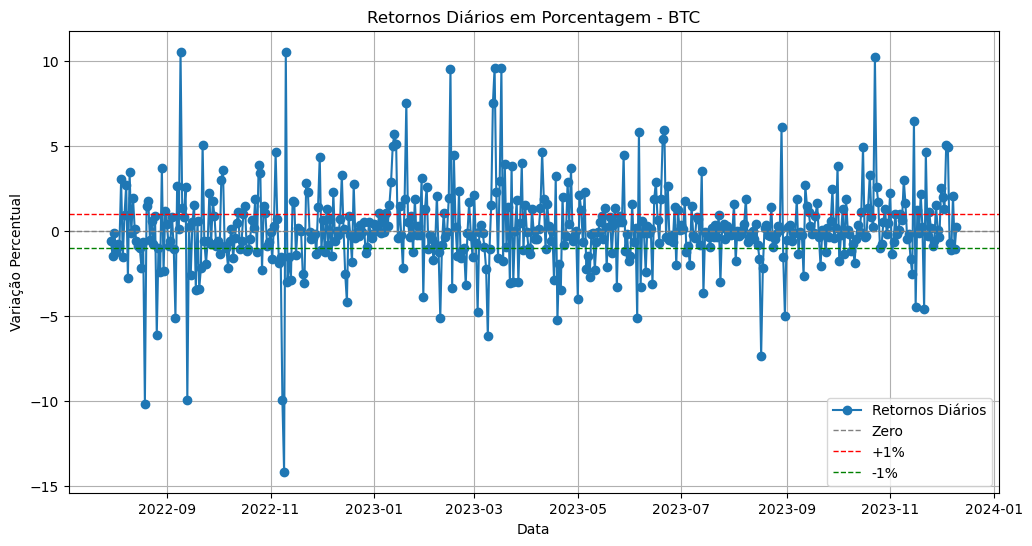

In [ ]:


df_BTC = dados[dados['moeda'] == 'BTC'].copy()
df_BTC['timestamp'] = pd.to_datetime(df_BTC['timestamp'], format='%Y-%m-%d')
df_BTC = df_BTC.dropna()

# Calcula os retornos diários em porcentagem
df_BTC['Retornos Diários (%)'] = df_BTC['close'].pct_change() * 100

# Cria um gráfico de linha para visualizar os retornos diários em porcentagem
plt.figure(figsize=(12, 6))
plt.plot(df_BTC['timestamp'], df_BTC['Retornos Diários (%)'], label='Retornos Diários', marker='o')
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Zero')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='+1%')
plt.axhline(-1, color='green', linestyle='--', linewidth=1, label='-1%')

plt.title('Retornos Diários em Porcentagem - BTC')
plt.xlabel('Data')
plt.ylabel('Variação Percentual')
plt.legend()
plt.grid(True)
plt.show()


# Retornos Diários em Porcentagem das demais Moedas:
# (ETH )
# (ADA)
# (BNB)

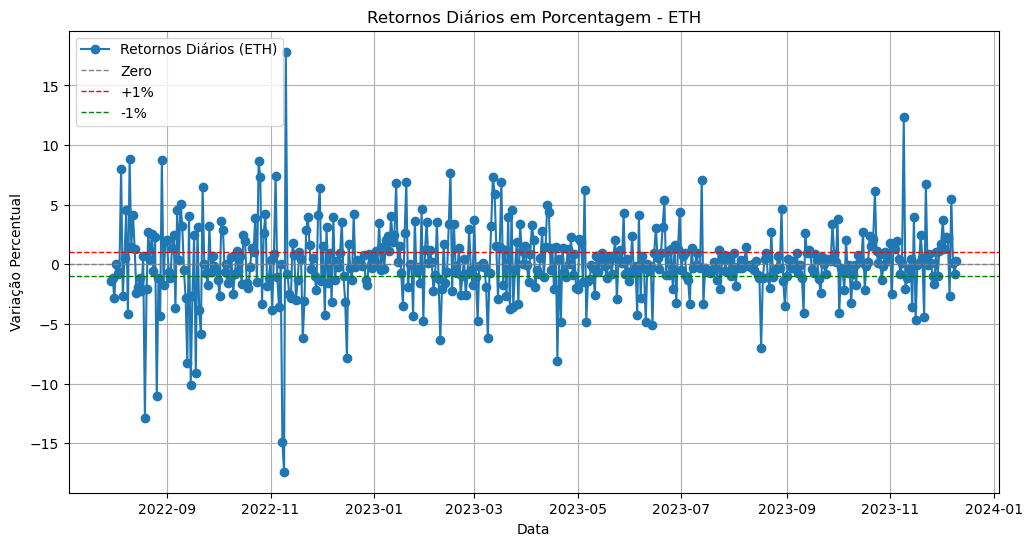

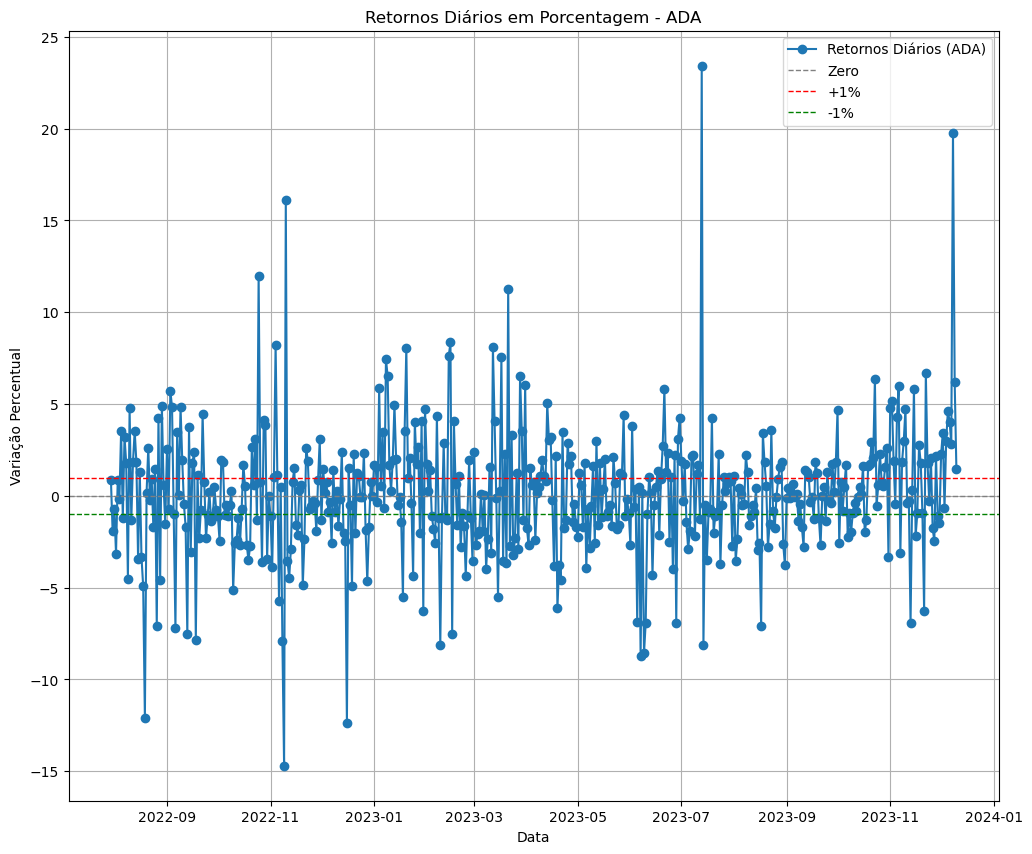

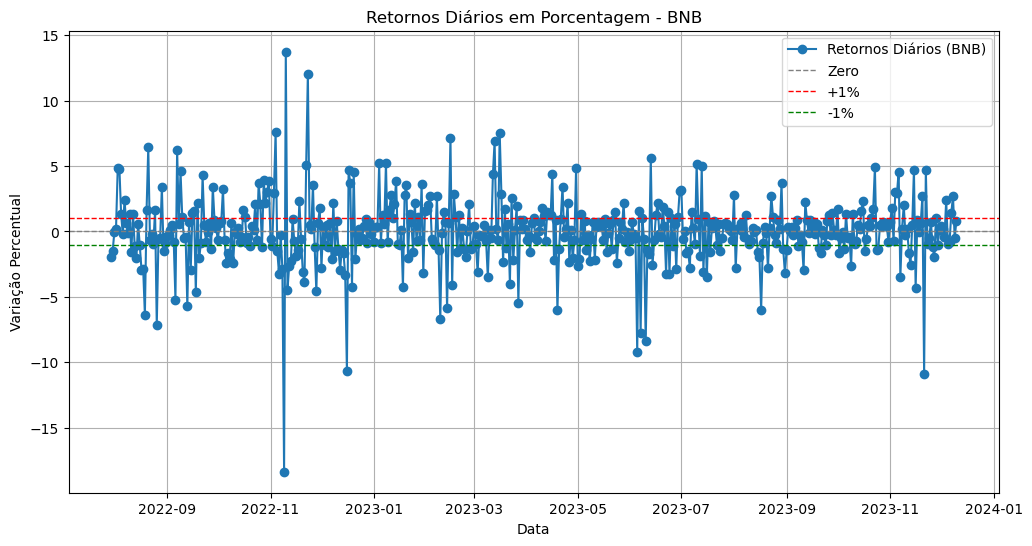

In [ ]:
# Moeda ETH
df_ETH = dados[dados['moeda'] == 'ETH'].copy()
df_ETH['timestamp'] = pd.to_datetime(df_ETH['timestamp'], format='%Y-%m-%d')
df_ETH = df_ETH.dropna()
df_ETH['Retornos Diários (%)'] = df_ETH['close'].pct_change() * 100

# Gráfico para ETH
plt.figure(figsize=(12, 6))
plt.plot(df_ETH['timestamp'], df_ETH['Retornos Diários (%)'], label='Retornos Diários (ETH)', marker='o')
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Zero')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='+1%')
plt.axhline(-1, color='green', linestyle='--', linewidth=1, label='-1%')
plt.title('Retornos Diários em Porcentagem - ETH')
plt.xlabel('Data')
plt.ylabel('Variação Percentual')
plt.legend()
plt.grid(True)
plt.show()

# Moeda ADA
df_ADA = dados[dados['moeda'] == 'ADA'].copy()
df_ADA['timestamp'] = pd.to_datetime(df_ADA['timestamp'], format='%Y-%m-%d')
df_ADA = df_ADA.dropna()
df_ADA['Retornos Diários (%)'] = df_ADA['close'].pct_change() * 100

# Gráfico para ADA
plt.figure(figsize=(12, 10))
plt.plot(df_ADA['timestamp'], df_ADA['Retornos Diários (%)'], label='Retornos Diários (ADA)', marker='o')
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Zero')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='+1%')
plt.axhline(-1, color='green', linestyle='--', linewidth=1, label='-1%')
plt.title('Retornos Diários em Porcentagem - ADA')
plt.xlabel('Data')
plt.ylabel('Variação Percentual')
plt.legend()
plt.grid(True)
plt.show()

# Moeda FDUSD
df_BNB = dados[dados['moeda'] == 'BNB'].copy()
df_BNB['timestamp'] = pd.to_datetime(df_BNB['timestamp'], format='%Y-%m-%d')
df_BNB = df_BNB.dropna()
df_BNB['Retornos Diários (%)'] = df_BNB['close'].pct_change() * 100

# Gráfico para FDUSD
plt.figure(figsize=(12, 6))
plt.plot(df_BNB['timestamp'], df_BNB['Retornos Diários (%)'], label='Retornos Diários (BNB)', marker='o')
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Zero')
plt.axhline(1, color='red', linestyle='--', linewidth=1, label='+1%')
plt.axhline(-1, color='green', linestyle='--', linewidth=1, label='-1%')
plt.title('Retornos Diários em Porcentagem - BNB')
plt.xlabel('Data')
plt.ylabel('Variação Percentual')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Certifique-se de substituir 'moeda_BTC' pelo DataFrame real associado ao Bitcoin (BTC)
df_BTC['mm7'] = df_BTC['close'].rolling(7).mean()
df_ETH['mm7'] = df_ETH['close'].rolling(7).mean()
df_ADA['mm7'] = df_ADA['close'].rolling(7).mean()
df_FDUSD['mm7'] = df_FDUSD['close'].rolling(7).mean()



C:\Users\Rodrigo_df\AppData\Local\Temp\ipykernel_24348\3927268382.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



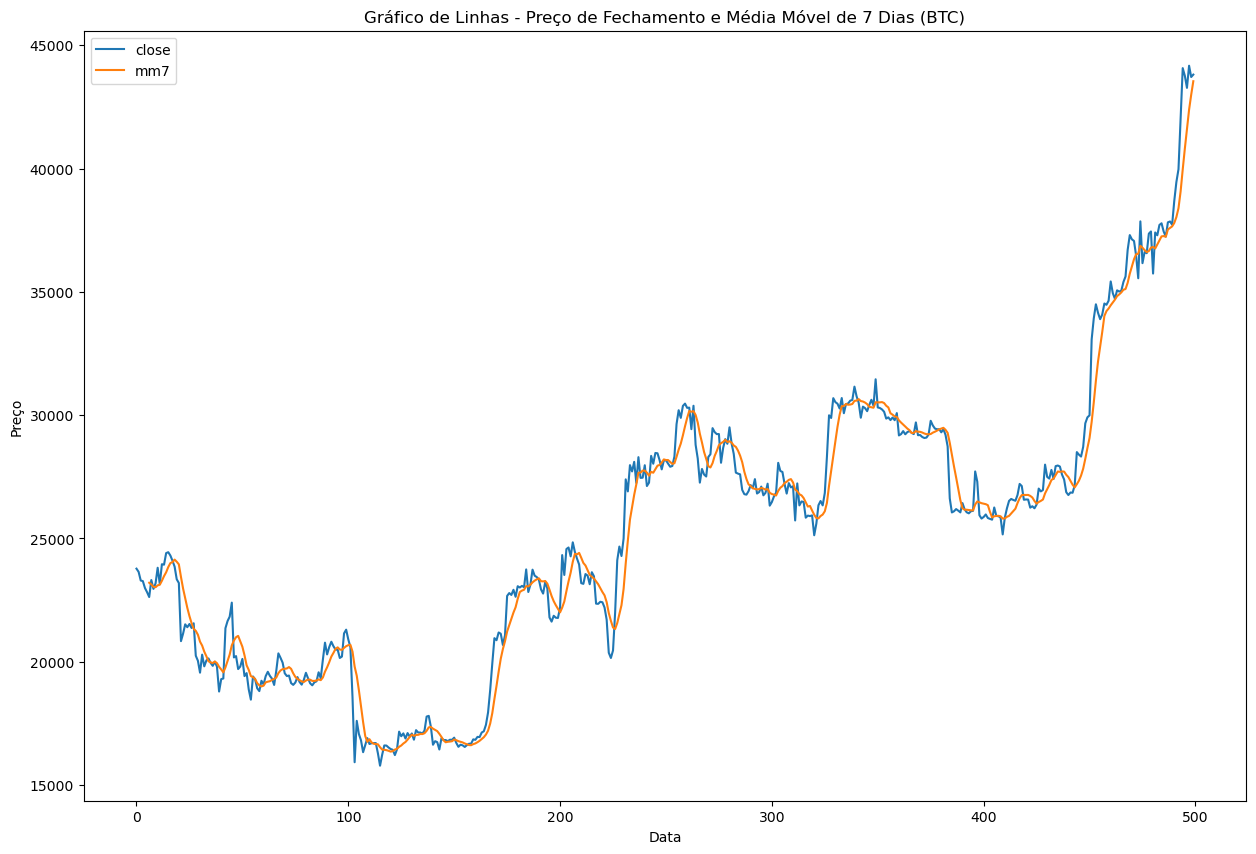

In [ ]:


df_BTC[['close','mm7']].plot(legend=True, label='Itau', figsize=(15, 10))

plt.title('Gráfico de Linhas - Preço de Fechamento e Média Móvel de 7 Dias (BTC)')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()

# Exiba o gráfico
plt.show()




C:\Users\Rodrigo_df\AppData\Local\Temp\ipykernel_24348\1847283614.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



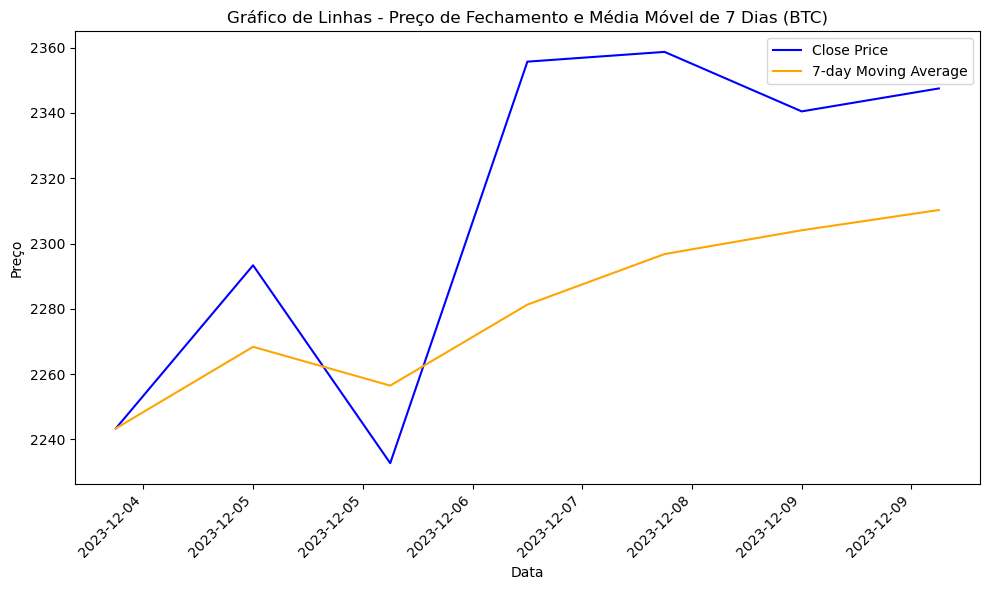

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que você já tenha o DataFrame df_BTC criado e as colunas 'date' e 'close' preenchidas

# Converta a coluna 'date' para o formato de data (se ainda não estiver no formato certo)
df_ETH['timestamp'] = pd.to_datetime(df_ETH['timestamp'], errors='coerce')

# Garanta que a coluna 'date' é do tipo datetime64[ns]
df_ETH['timestamp'] = pd.to_datetime(df_ETH['timestamp'], errors='coerce')

# Ordene o DataFrame pelo valor da coluna 'date'
df_ETH = df_ETH.sort_values(by='timestamp')

# Selecione apenas os últimos 7 dias de dados
df_last_7_days = df_ETH.tail(7)

# Adicione a coluna 'mm7' ao DataFrame df_last_7_days usando o código corrigido
df_last_7_days['mm7'] = df_last_7_days['close'].rolling(7, min_periods=1).mean()

# Plote o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(df_last_7_days['timestamp'], df_last_7_days['close'], label='Close Price', color='blue')
plt.plot(df_last_7_days['timestamp'], df_last_7_days['mm7'], label='7-day Moving Average', color='orange')

# Adicione rótulos e legendas
plt.title('Gráfico de Linhas - Preço de Fechamento e Média Móvel de 7 Dias (BTC)')
plt.xlabel('Data')
plt.ylabel('Preço')

# Formate o eixo x para exibir rótulos de data de forma mais legível
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='both'))
plt.xticks(rotation=45, ha='right')  # Rotação dos rótulos para melhor legibilidade

plt.legend()

# Exiba o gráfico
plt.tight_layout()  # Ajuste automático do layout para evitar cortar rótulos
plt.show()





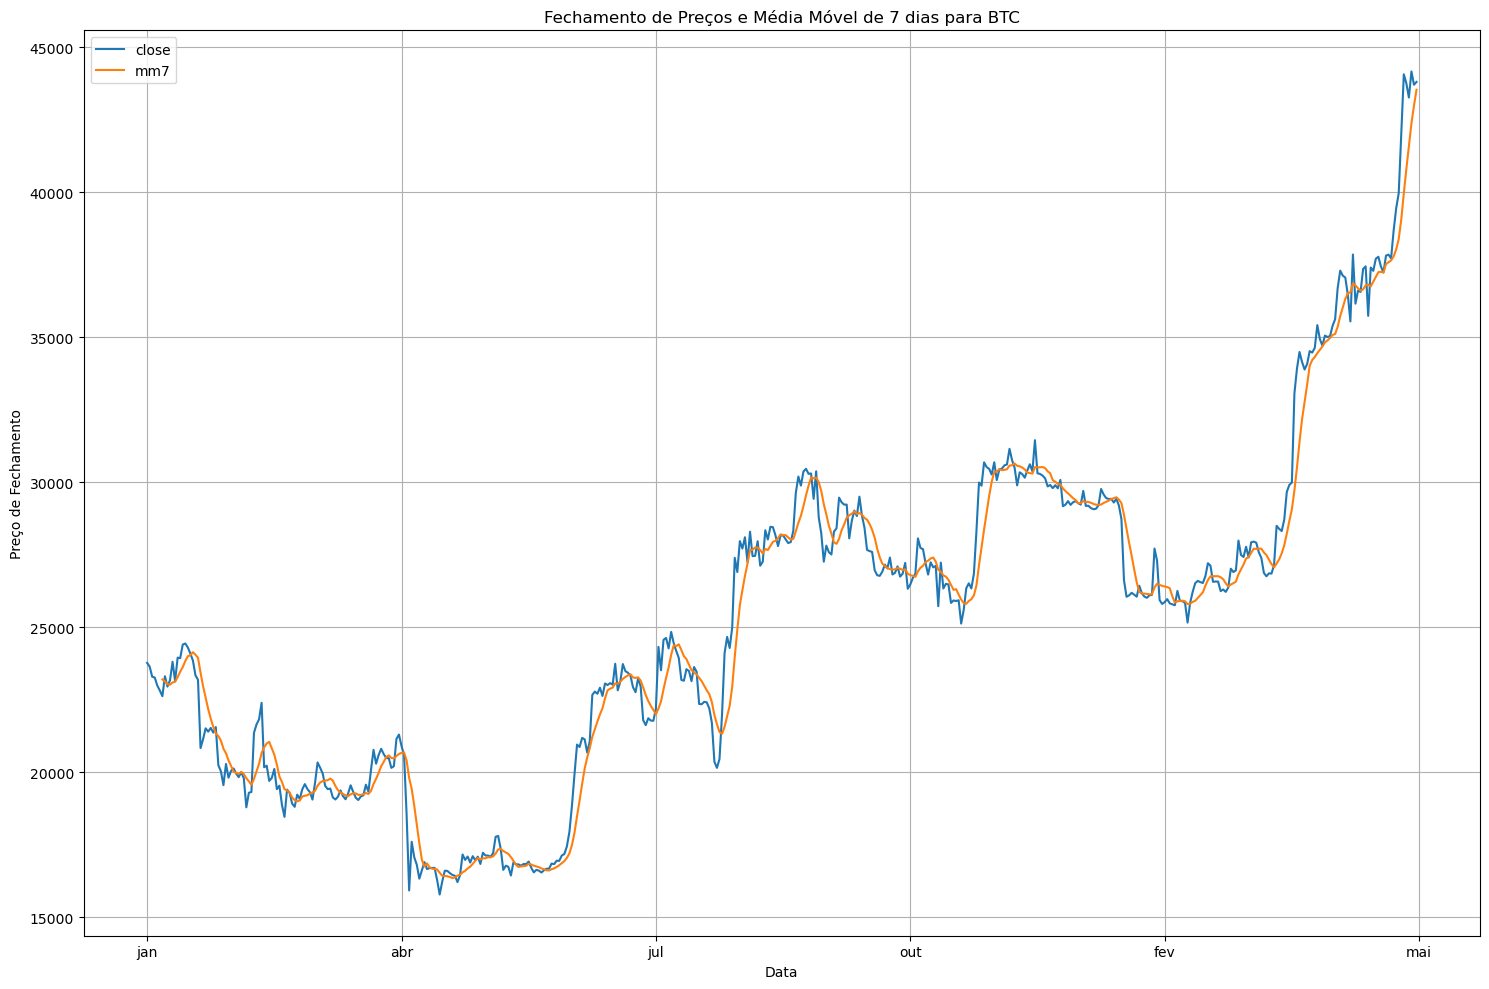

In [ ]:
import matplotlib.dates as mdates
import locale
import matplotlib.pyplot as plt

# Configura o idioma do ambiente para português
locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')

# Configura o tamanho da figura
plt.figure(figsize=(15, 10))

# Cria subplot para BTC
ax1 = plt.subplot(111)

# Plot para BTC
df_BTC[['close', 'mm7']].plot(ax=ax1, legend=True, label='BTC')

# Adiciona rótulos e título para o subplot
ax1.set_title('Fechamento de Preços e Média Móvel de 7 dias para BTC')
ax1.set_xlabel('Data')
ax1.set_ylabel('Preço de Fechamento')

# Configura o formato do eixo x para mostrar apenas os meses em português
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# Adiciona a grade para melhor visualização
ax1.grid(True)

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()


In [ ]:
dias = [15, 30, 60]

for dia in dias:
    df_BTC['mm' + str(dia)] = df_BTC['close'].rolling(dia).mean()
    df_ETH['mm' + str(dia)] = df_BTC['close'].rolling(dia).mean()
    df_ADA['mm' + str(dia)] = df_BTC['close'].rolling(dia).mean()
    df_BNB['mm' + str(dia)] = df_BTC['close'].rolling(dia).mean()



C:\Users\Rodrigo_df\AppData\Local\Temp\ipykernel_24348\3978978877.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



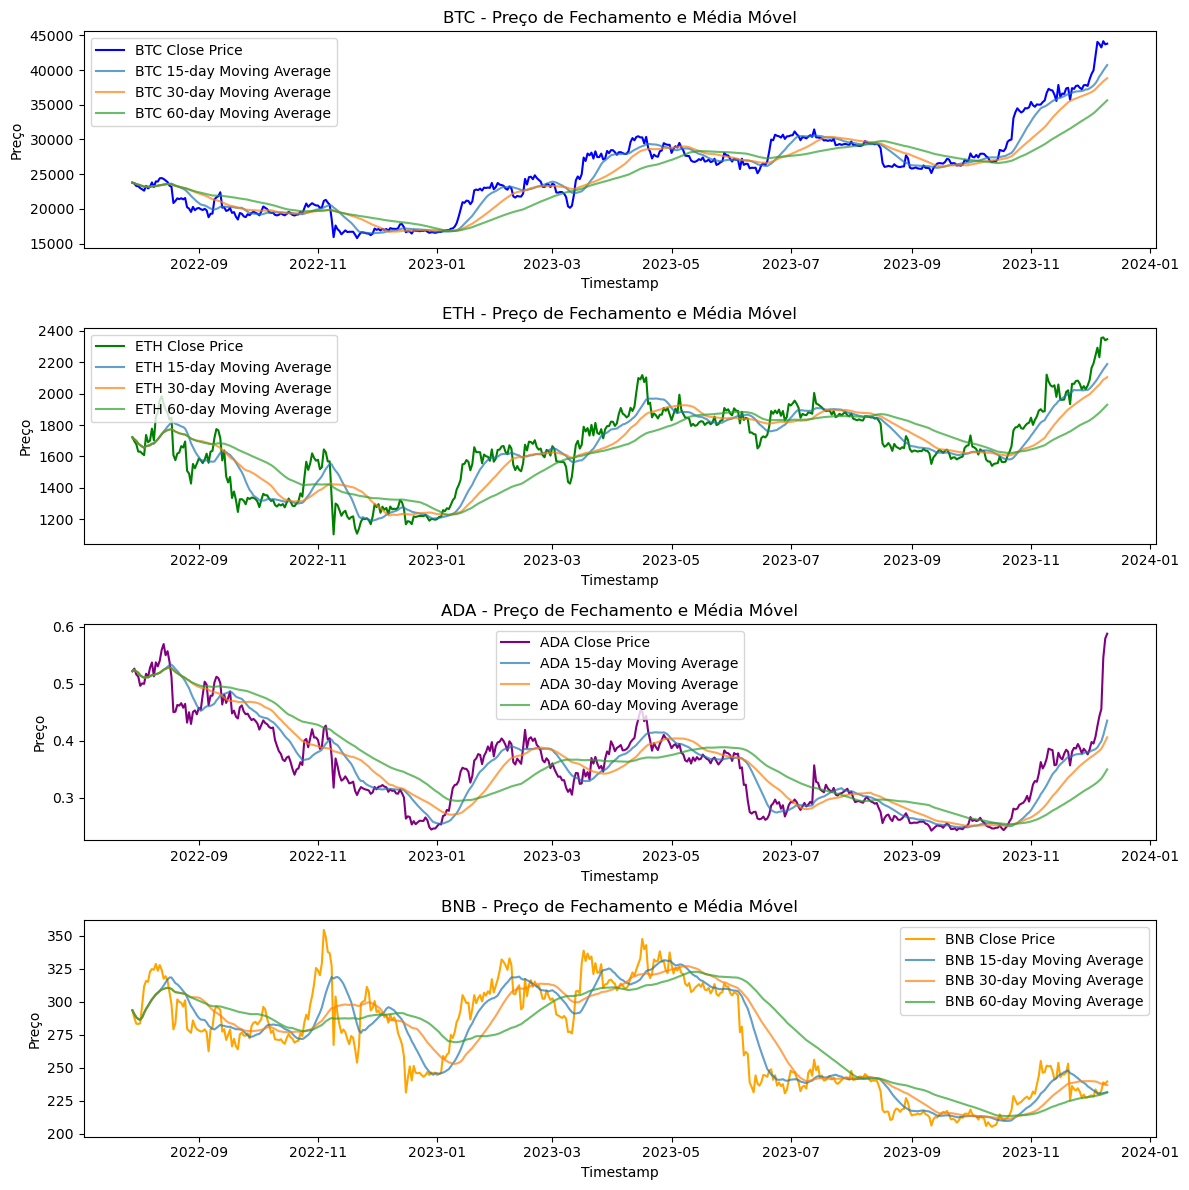

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que você já tenha os DataFrames df_BTC, df_ETH, df_ADA, df_BNB criados e as colunas 'timestamp' e 'close' preenchidas

# Lista de dias para a média móvel
dias = [15, 30, 60]

# Função para calcular a média móvel para uma moeda específica
def calcular_media_movel(df, moeda):
    df = df.copy()  # Crie uma cópia explícita do DataFrame
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df = df.sort_values(by='timestamp')
    for dia in dias:
        df['mm' + str(dia)] = df['close'].rolling(dia, min_periods=1).mean()
    return df

# Ajustes para df_ETH
df_ETH['timestamp'] = pd.to_datetime(df_ETH['timestamp'], errors='coerce')
df_ETH = df_ETH.sort_values(by='timestamp')

# Calcular a média móvel para cada moeda
df_BTC = calcular_media_movel(df_BTC, 'BTC')
df_ETH = calcular_media_movel(df_ETH, 'ETH')
df_ADA = calcular_media_movel(df_ADA, 'ADA')
df_BNB = calcular_media_movel(df_BNB, 'BNB')

# Plote os gráficos de linhas para cada moeda
plt.figure(figsize=(12, 12))

# BTC
plt.subplot(4, 1, 1)
plt.plot(df_BTC['timestamp'], df_BTC['close'], label='BTC Close Price', color='blue')
for dia in dias:
    plt.plot(df_BTC['timestamp'], df_BTC['mm' + str(dia)], label=f'BTC {dia}-day Moving Average', alpha=0.7)
plt.title('BTC - Preço de Fechamento e Média Móvel')
plt.xlabel('Timestamp')
plt.ylabel('Preço')
plt.legend()

# ETH
plt.subplot(4, 1, 2)
plt.plot(df_ETH['timestamp'], df_ETH['close'], label='ETH Close Price', color='green')
for dia in dias:
    plt.plot(df_ETH['timestamp'], df_ETH['mm' + str(dia)], label=f'ETH {dia}-day Moving Average', alpha=0.7)
plt.title('ETH - Preço de Fechamento e Média Móvel')
plt.xlabel('Timestamp')
plt.ylabel('Preço')
plt.legend()

# ADA
plt.subplot(4, 1, 3)
plt.plot(df_ADA['timestamp'], df_ADA['close'], label='ADA Close Price', color='purple')
for dia in dias:
    plt.plot(df_ADA['timestamp'], df_ADA['mm' + str(dia)], label=f'ADA {dia}-day Moving Average', alpha=0.7)
plt.title('ADA - Preço de Fechamento e Média Móvel')
plt.xlabel('Timestamp')
plt.ylabel('Preço')
plt.legend()

# BNB
plt.subplot(4, 1, 4)
plt.plot(df_BNB['timestamp'], df_BNB['close'], label='BNB Close Price', color='orange')
for dia in dias:
    plt.plot(df_BNB['timestamp'], df_BNB['mm' + str(dia)], label=f'BNB {dia}-day Moving Average', alpha=0.7)
plt.title('BNB - Preço de Fechamento e Média Móvel')
plt.xlabel('Timestamp')
plt.ylabel('Preço')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
df_BTC

,timestamp,open,high,low,close,volume,moeda,Retornos Diários (%),mm7,mm15,mm30,mm60
0,2022-07-29,23845.25,24442.66,23414.03,23773.75,198298.50623,BTC,NaN,23773.750000,NaN,NaN,NaN
1,2022-07-30,23777.28,24668.00,23502.25,23643.51,151060.13211,BTC,-0.547831,23708.630000,NaN,NaN,NaN
2,2022-07-31,23644.64,24194.82,23227.31,23293.32,127743.32483,BTC,-1.481125,23570.193333,NaN,NaN,NaN
3,2022-08-01,23296.36,23509.68,22850.00,23268.01,144210.16219,BTC,-0.108658,23494.647500,NaN,NaN,NaN
4,2022-08-02,23266.90,23459.89,22654.37,22987.79,158073.28225,BTC,-1.204314,23393.276000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495,2023-12-06,44073.82,44297.21,43335.28,43762.69,51431.10492,BTC,-0.704803,40808.028571,39081.113333,37840.184333,34559.366333
496,2023-12-07,43762.69,44047.33,42821.10,43273.14,47103.26845,BTC,-1.118647,41600.768571,39472.100000,38102.651667,34815.301167
497,2023-12-08,43273.15,44700.00,43081.10,44170.99,42900.37556,BTC,2.074844,42384.835714,39930.547333,38387.527333,35091.649000
498,2023-12-09,44171.00,44358.02,43584.51,43713.60,24925.97008,BTC,-1.035499,42993.871429,40330.549333,38621.277667,35363.707000


<Axes: >

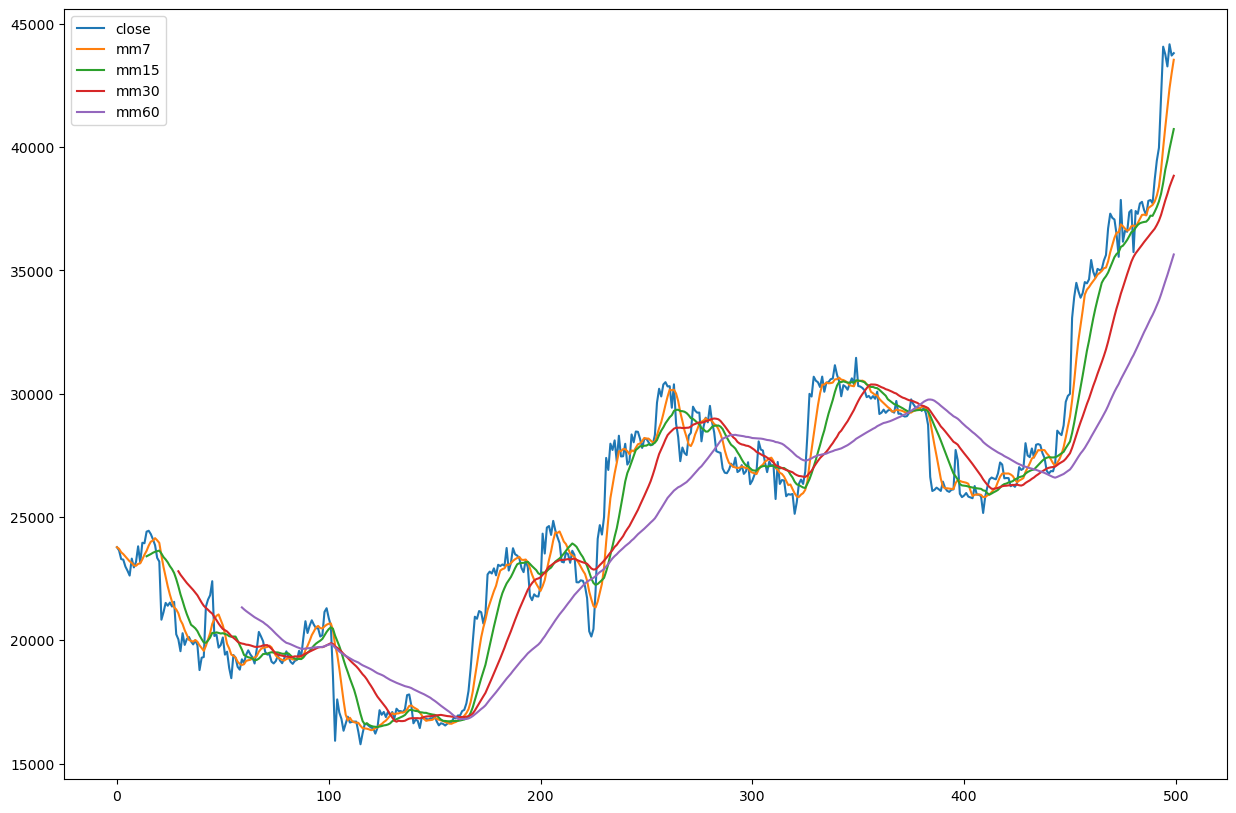

In [ ]:
import matplotlib.pyplot as plt

df_BTC[['close','mm7','mm15','mm30','mm60']].plot(legend=True, label='BTC', figsize=(15, 10))

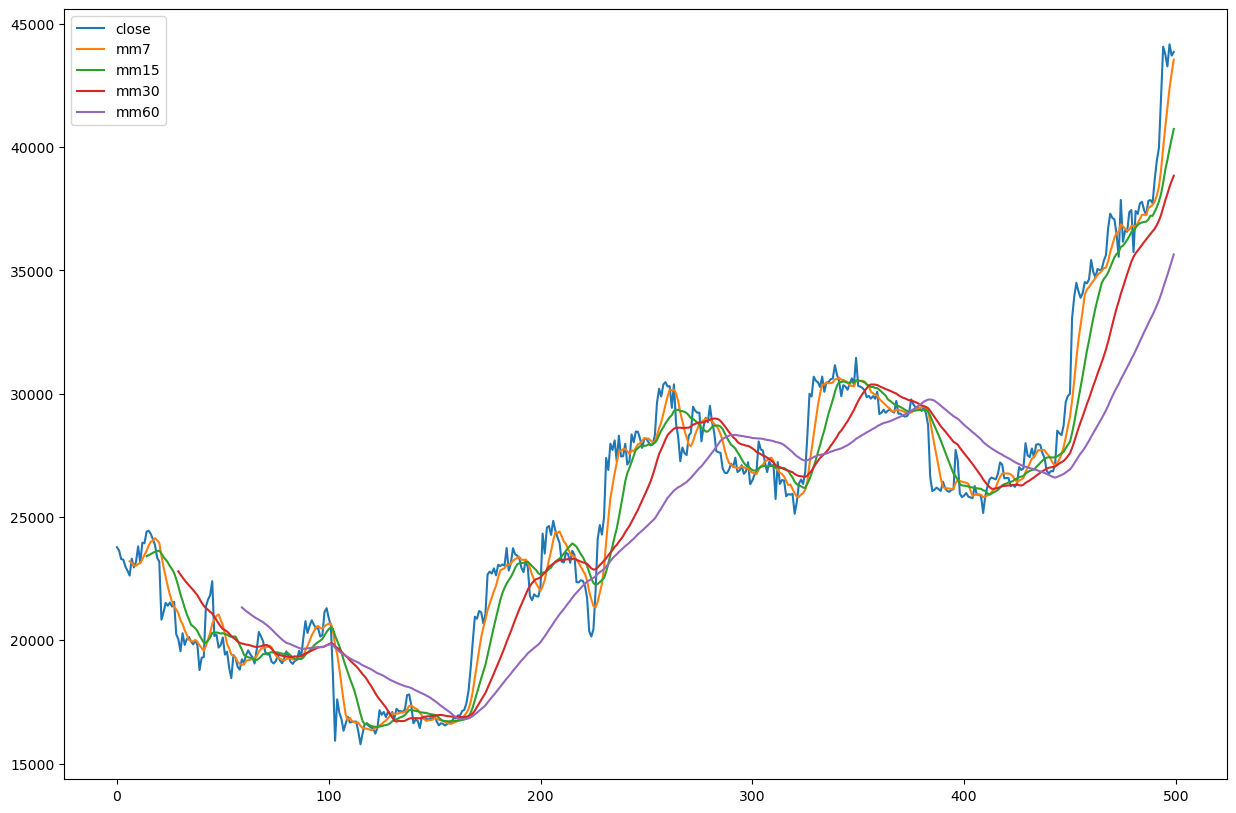

In [ ]:
import matplotlib.pyplot as plt

# Certifique-se de que a coluna de datas está no formato correto
df_BTC['timestamp'] = pd.to_datetime(df_BTC['timestamp'])

# Calcular médias móveis
df_BTC['mm7'] = df_BTC['close'].rolling(7).mean()
df_BTC['mm15'] = df_BTC['close'].rolling(15).mean()
df_BTC['mm30'] = df_BTC['close'].rolling(30).mean()
df_BTC['mm60'] = df_BTC['close'].rolling(60).mean()

# Plotar os dados
df_BTC[['close', 'mm7', 'mm15', 'mm30', 'mm60']].plot(legend=True, label='BTC', figsize=(15, 10))

# Definir rótulos do eixo x usando o formato de mês e ano
plt.xticks(df_BTC.index, df_BTC['timestamp'].dt.strftime('%b %Y'), rotation=45)

# Adicionar títulos
plt.title('Médias Móveis para Bitcoin (BTC)')
plt.xlabel('Data (Mês Ano)')
plt.ylabel('Preço de Fechamento (USDT)')

# Exibir o gráfico
plt.show()

# Gráfico de média Exponencial
# A média móvel exponencial é projetada para ser mais sensível às mudanças recentes nos dados, capturando melhor as tendências emergentes.
# Isso a torna uma ferramenta valiosa para identificar pontos de entrada e saída em operações de compra e venda de ativos

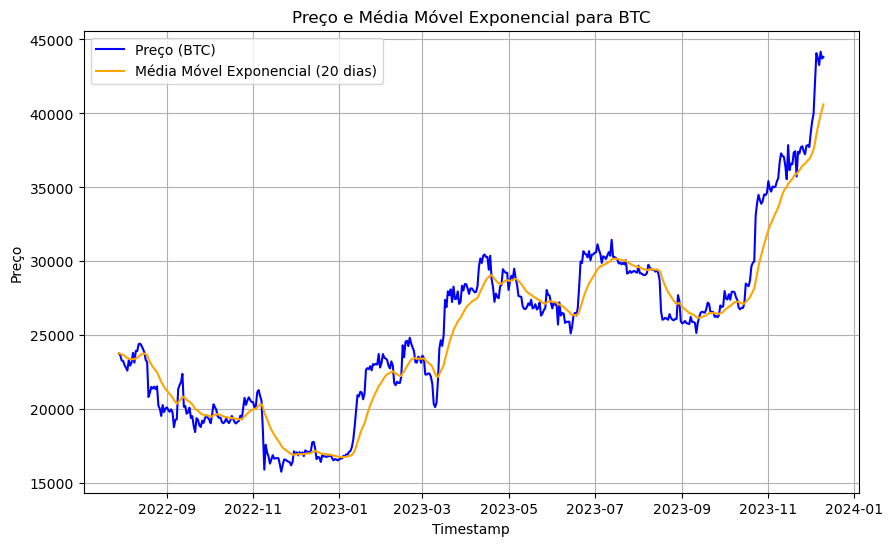

In [ ]:

dados_btc = dados[dados['moeda'] == 'BTC']

# Calcula a média móvel exponencial
media_movel_exp = dados_btc['close'].ewm(span=20, adjust=False).mean()

# Plota o gráfico
plt.figure(figsize=(10, 6))
plt.plot(dados_btc['timestamp'], dados_btc['close'], label='Preço (BTC)', color='blue')
plt.plot(dados_btc['timestamp'], media_movel_exp, label='Média Móvel Exponencial (20 dias)', color='orange')
plt.title('Preço e Média Móvel Exponencial para BTC')
plt.xlabel('Timestamp')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()



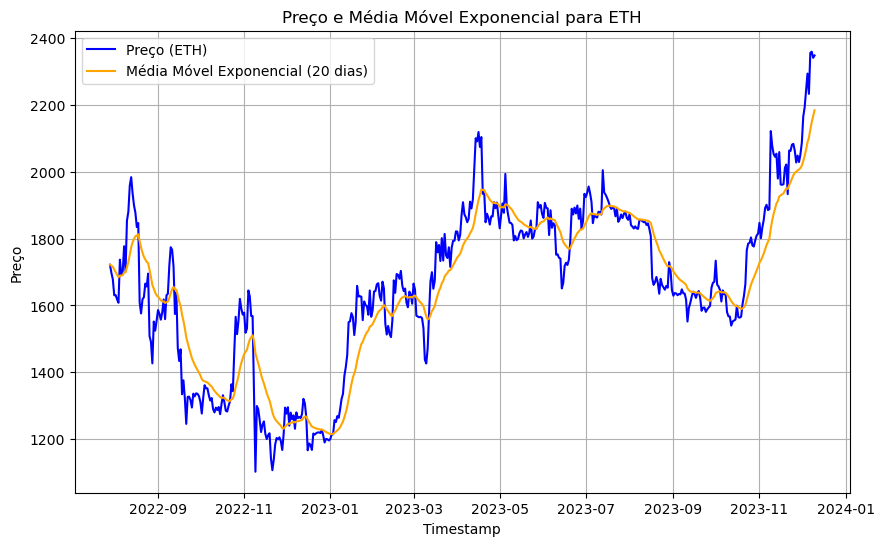

In [ ]:

dados_ETH = dados[dados['moeda'] == 'ETH']

# Calcula a média móvel exponencial
media_movel_exp = dados_ETH['close'].ewm(span=20, adjust=False).mean()

# Plota o gráfico
plt.figure(figsize=(10, 6))
plt.plot(dados_ETH['timestamp'], dados_ETH['close'], label='Preço (ETH)', color='blue')
plt.plot(dados_ETH['timestamp'], media_movel_exp, label='Média Móvel Exponencial (20 dias)', color='orange')
plt.title('Preço e Média Móvel Exponencial para ETH')
plt.xlabel('Timestamp')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()

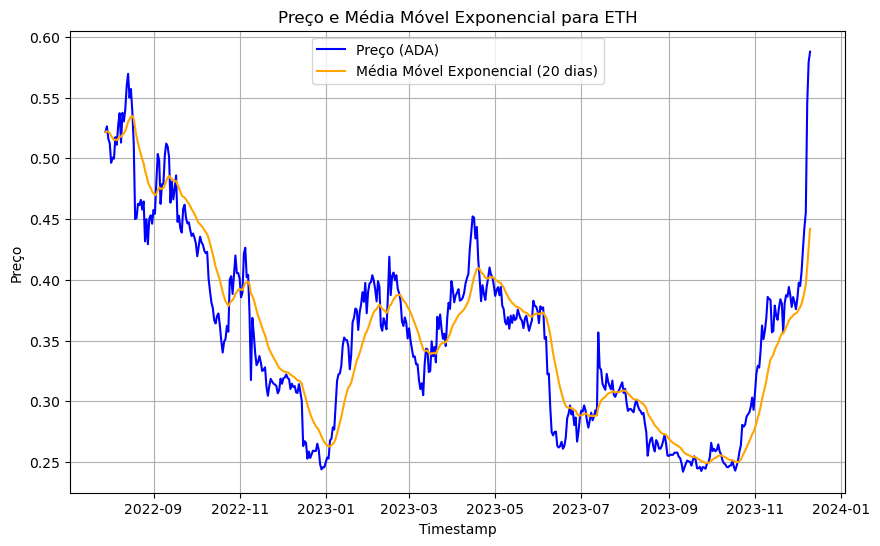

In [ ]:
dados_ADA = dados[dados['moeda'] == 'ADA']

# Calcula a média móvel exponencial
media_movel_exp = dados_ADA['close'].ewm(span=20, adjust=False).mean()

# Plota o gráfico
plt.figure(figsize=(10, 6))
plt.plot(dados_ADA['timestamp'], dados_ADA['close'], label='Preço (ADA)', color='blue')
plt.plot(dados_ADA['timestamp'], media_movel_exp, label='Média Móvel Exponencial (20 dias)', color='orange')
plt.title('Preço e Média Móvel Exponencial para ADA')
plt.xlabel('Timestamp')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()

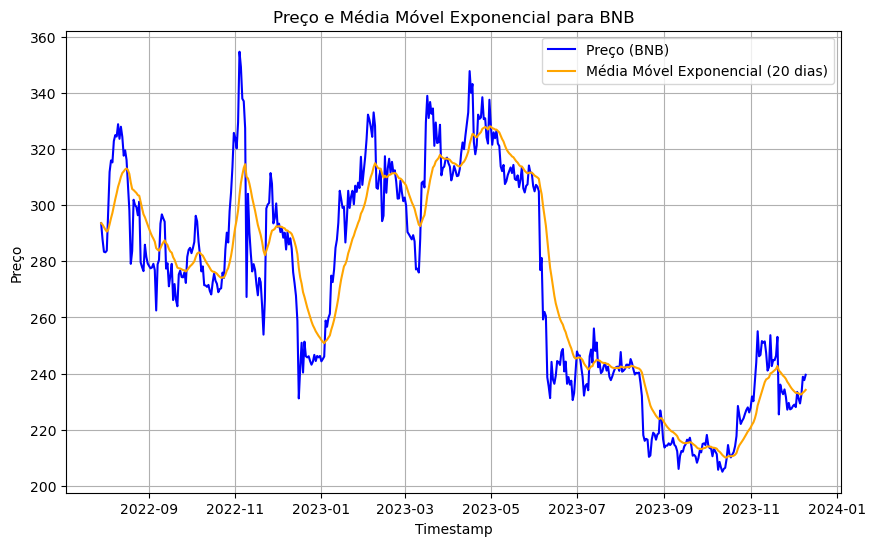

In [ ]:
dados_BNB= dados[dados['moeda'] == 'BNB']

# Calcula a média móvel exponencial
media_movel_exp = dados_BNB['close'].ewm(span=20, adjust=False).mean()

# Plota o gráfico
plt.figure(figsize=(10, 6))
plt.plot(dados_BNB['timestamp'], dados_BNB['close'], label='Preço (BNB)', color='blue')
plt.plot(dados_BNB['timestamp'], media_movel_exp, label='Média Móvel Exponencial (20 dias)', color='orange')
plt.title('Preço e Média Móvel Exponencial para BNB')
plt.xlabel('Timestamp')
plt.ylabel('Preço')
plt.legend()
plt.grid(True)
plt.show()

# Histograma de Probabilidade de Retorno

In [ ]:


# Calcular o retorno diário
df_BTC['retorno_diario'] = df_BTC['close'].pct_change()

# Remover valores NaN
df_BTC = df_BTC.dropna()

# Plotar o histograma
plt.figure(figsize=(10, 6))
plt.hist(df_BTC['retorno_diario'], bins=50, alpha=0.75, density=True)
plt.title('Histograma de Retorno Diário')
plt.xlabel('Retorno Diário')
plt.ylabel('Probabilidade')

# Exibir o gráfico
plt.show()


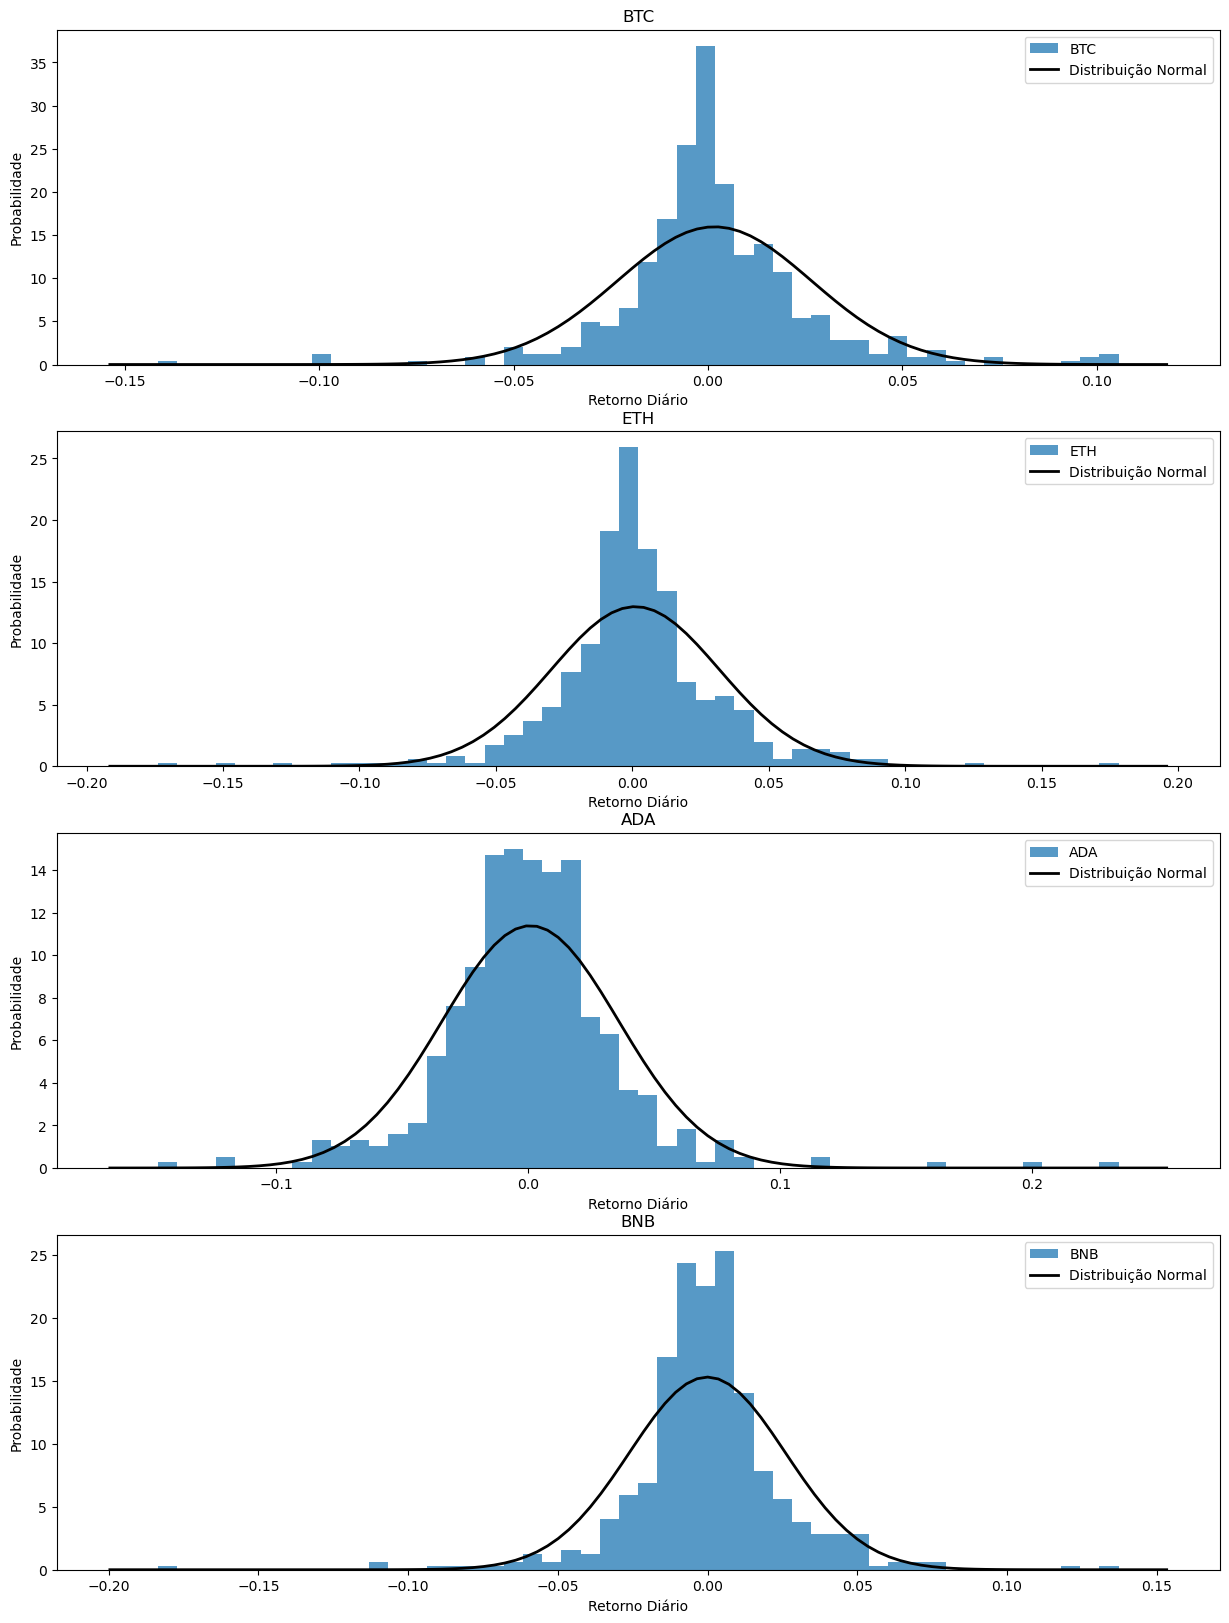

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

dfs = [df_BTC, df_ETH, df_ADA, df_BNB]
labels = ['BTC', 'ETH', 'ADA', 'BNB']

# Cria um gráfico
fig, axs = plt.subplots(4, 1, figsize=(15, 20))

# Loop através de cada dataframe
for i, (df, label) in enumerate(zip(dfs, labels)):
    # Calcular o retorno diário
    df['retorno_diario'] = df['close'].pct_change()

    # Remover valores NaN
    df = df.dropna()

    # Plotar o histograma
    axs[i].hist(df['retorno_diario'], bins=50, alpha=0.75, density=True, label=label)

    # Ajustar uma distribuição normal à distribuição de dados
    mu, std = norm.fit(df['retorno_diario'])
    xmin, xmax = axs[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    # Plotar a curva ajustada
    axs[i].plot(x, p, 'k', linewidth=2, label='Distribuição Normal')

    axs[i].set_title(label)
    axs[i].set_xlabel('Retorno Diário')
    axs[i].set_ylabel('Probabilidade')

    # Adicionar legenda
    axs[i].legend(loc='upper right')

# Exibir o gráfico
plt.show()


# Avaliação do Risco vs Retorno do Investimento

In [ ]:

# # Calcular o retorno médio e risco para BTC
retorno_BTC = df_BTC['retorno_diario'].dropna().mean()
risco_BTC = df_BTC['retorno_diario'].dropna().std()

# Calcular o retorno médio e risco para ETH
retorno_ETH = df_ETH['retorno_diario'].dropna().mean()
risco_ETH = df_ETH['retorno_diario'].dropna().std()

# Calcular o retorno médio e risco para BNB
retorno_BNB = df_BNB['retorno_diario'].dropna().mean()
risco_BNB = df_BNB['retorno_diario'].dropna().std()

# Calcular o retorno médio e risco para ADA
retorno_ADA = df_ADA['retorno_diario'].dropna().mean()
risco_ADA = df_ADA['retorno_diario'].dropna().std()





In [ ]:
# Resultados para BTC
print(f"BTC - Retorno Médio: {retorno_BTC}, Risco: {risco_BTC}")

# Resultados para ETH
print(f"ETH - Retorno Médio: {retorno_ETH}, Risco: {risco_ETH}")

# Resultados para BNB
print(f"BNB - Retorno Médio: {retorno_BNB}, Risco: {risco_BNB}")

# Resultados para ADA
print(f"ADA - Retorno Médio: {retorno_ADA}, Risco: {risco_ADA}")


BTC - Retorno Médio: 0.001654064785751669, Risco: 0.025031874842683943
ETH - Retorno Médio: 0.0010984110795411806, Risco: 0.030799444491087766
BNB - Retorno Médio: -6.223103500126207e-05, Risco: 0.026127413439965885
ADA - Retorno Médio: 0.0008426704668323912, Risco: 0.03507113670796217


IndexError: invalid index to scalar variable.

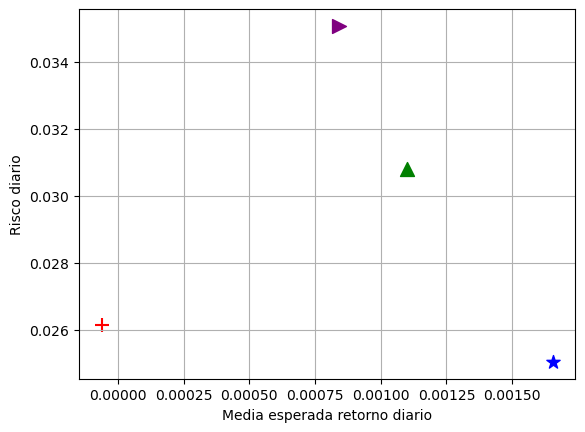

In [ ]:
plt.grid(True)
plt.xlabel('Media esperada retorno diario')
plt.ylabel('Risco diario')

# Plota os pontos com rótulos e ajustes visuais
plt.scatter(retorno_BTC, risco_BTC, marker="*", label='BTC', color='blue', s=100)
plt.scatter(retorno_ETH, risco_ETH, marker="^", label='ETH', color='green', s=100)
plt.scatter(retorno_BNB, risco_BNB, marker="+", label='BNB', color='red', s=100)
plt.scatter(retorno_ADA, risco_ADA, marker=">", label='ADA', color='purple', s=100)

# Adiciona rótulos aos pontos
for i, txt in enumerate(['Ponto 1', 'Ponto 2', 'Ponto 3']):
    plt.text(retorno_BTC[i], risco_BTC[i], txt, fontsize=8, ha='right')


plt.legend()
plt.show()